# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fahma Zuaf Zarir
- **Email:** fahmazuafzarir14@gmail.com
- **ID Dicoding:** Fahma Zuaf Zarir

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah sepeda yang dipinjam selama setahun?
- Apakah ada perbedaan yang signifikan dalam peminjaman sepeda antara hari kerja dan hari libur?
- Bagaimana jumlah peminjaman sepeda pada hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from scipy.stats import ttest_ind

## Data Wrangling

Pada bagian ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih Bike Sharing Dataset, maka saya mengimpor file **day.csv** dan **hour.csv**

### Gathering Data

#### Load Tabel Day

In [3]:
## Menampilkan semua baris
pd.set_option('display.max_columns',None)
 
##load data day
day_df = pd.read_csv("D:\ID CAMP 2024\Dashboard\main_day.csv")
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
#Menghitung kolom tabel day.csv
print("Jumlah kolom dari day.csv :",day_df.shape[1])

Jumlah kolom dari day.csv : 16


#### Load Tabel Hours

In [5]:
hour_df = pd.read_csv("D:\ID CAMP 2024\Data\hour.csv")
print(hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [6]:
#Menghitung jumlah kolom pada hours.csv
print("Jumlah kolom dari hours.csv :",hour_df.shape[1])

Jumlah kolom dari hours.csv : 17


**Insight:**
- Untuk tabel **day.csv** terdapat 16 kolom
- Untuk tabel **hours.csv** terdapat 17 kolom

#### Data Dictionary

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Menilai ``day_df``

1. Mengecek tipe data ``day_df``

In [7]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Dapat kita lihat diatas, terdapat 1 tipe data yang tidak sesuai. Data yang perlu diperbaiki yaitu pada kolom ``dteday`` yang tipe datanya ``object`` diubah menjadi ``datetime``

2. Mengecek apakah ada *missing value* pada ``day_df``

In [8]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dilihat dari output tersebut bahwa tabel ``day_df`` tidak ada *missing value*

3. Mengecek apakah ada data yang terduplikasi

In [9]:
print("Jumlah data yang terduplikasi :",day_df.duplicated().sum())

Jumlah data yang terduplikasi : 0


Pada tabel ``day_df`` terdapat 0 data yang terduplikasi, artinya semua data bersifat unik atau tidak ada data yang terduplikasi

4. Mengecek *statistic summary* ``day_df``

In [10]:
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

Dapat dilihat output diatas, tidak ada keanehan pada *statistic summary*-nya pada tabel ``day_df``

#### Menilai ``hours_df``

1. Mengecek tipe data ``hours_df``

In [11]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Dapat dilihat output dari tabel ``hour_df`` terdapat 1 tipe data yang tidak sesuai. Data yang perlu diperbaiki yaitu pada kolom dteday yang tipe datanya object diubah menjadi datetime

2. Mengecek apakah ada *missing value* pada ``hours_df``

In [12]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Pada output diatas tidak ada *missing value* pada tabel ``hours_df``

3. Mengecek apakah ada data yang terduplikasi pada tabel `hours_df`

In [13]:
print("Jumlah data yang terduplikasi :",hour_df.duplicated().sum())

Jumlah data yang terduplikasi : 0


Output tersebut menjelaskan bahwa tidak ada data yang terduplikat pada tabel ``hours_df``

4. Mengecek *statistic summary* ``hours_df``

In [14]:
print(hour_df.describe(include="all"))

           instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count  

Dapat dilihat output diatas, tidak ada keanehan pada *statistic summary*-nya pada tabel **hours_df**

**Insight:**
- Dengan melakukan Assesing Data kita bisa mengetahui apakah data tersebut apakah bias
- Terdapat kesalaha tipe data pada kolom dteday yang awwalnya bertipe object seharusnya datetime

### Cleaning Data

1. Menghapus tabel yang tidak diperlukan

Sebelum masuk tahap selanjutnya hapus tabel ``hours_df`` terlebih dahulu karena tabel ``hours_df`` tidak relevan dengan pertanyaan bisnis yang sudah ditetapkan dan isi dari tabel ``hours_df`` juga sama seperti tabel ``day_df`` yang membedakan hanya kolom ``hr`` nya saja pada tabel ``hours_df``.

In [15]:
del hour_df

2. Menghapus beberapa kolom yang tidak diperlukan

Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:

- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

In [16]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengubah beberapa detail nama kolom

Karena nama kolom-kolom pada tabel ``day_df`` kurang dengan style saya maka akan saya ubah dan juga tipe data yang salah akan saya ubah juga.

In [17]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [18]:
# Mengubah tipe data kolom dateday
day_df["dateday"] = pd.to_datetime(day_df.dateday)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    int64         
 2   year          731 non-null    int64         
 3   month         731 non-null    int64         
 4   holiday       731 non-null    int64         
 5   weekday       731 non-null    int64         
 6   workingday    731 non-null    int64         
 7   weather_cond  731 non-null    int64         
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 80.1 KB


In [19]:
# Mengubah nilai menjadi keterangan pada kolom season,year,month,weekday,workingday
#Season
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
#Month
day_df['month'] = day_df['dateday'].dt.month_name()
#Year
day_df['year'] = day_df['dateday'].dt.year
#Weekday
day_df['weekday'] = day_df['dateday'].dt.day_name()
#Workingday
day_df['workingday'] = day_df['workingday'].map({
    0: 'Tidak', 1: 'Ya'})

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Saturday,Tidak,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,Tidak,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,Ya,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,Ya,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,Ya,1,0.226957,0.229270,0.436957,82,1518,1600


In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    object        
 2   year          731 non-null    int32         
 3   month         731 non-null    object        
 4   holiday       731 non-null    int64         
 5   weekday       731 non-null    object        
 6   workingday    731 non-null    object        
 7   weather_cond  731 non-null    int64         
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(4)
memory usage: 77.2+ KB


## Exploratory Data Analysis (EDA)

### Explore Data ``day_df``

1. Mengelompokkan penyewa sepeda berdasarkan bulan

In [21]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
            max   min         mean     sum
month                                     
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

Dapat dilihat pada output diatas penyewa sepeda terbanyak selama setahun pada bulan September dan penyewa sepeda paling sedikit pada bulan Oktober

2. Mengelompokkan penyewa sepeda berdasarkan season/musim

In [22]:
# Mengelompokkan data berdasarkan season/musim dan menghitung total penyewaan sepeda per musim
season_group = day_df.groupby("season")["count"].sum().reset_index()

# Menampilkan hasil
print(season_group)

   season    count
0    Fall  1061129
1  Spring   471348
2  Summer   918589
3  Winter   841613


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38876\1664614718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="count", data=season_group,palette="Set1")


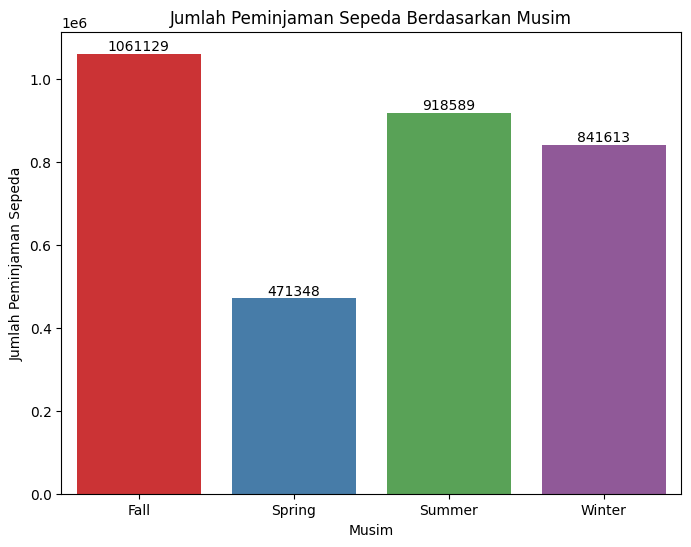

In [23]:
# Membuat barplot jumlah peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8,6))
sns.barplot(x="season", y="count", data=season_group,palette="Set1")

# Menambahkan keterangan angka pada setiap bar
for index, value in enumerate(season_group["count"]):
    plt.text(index, value, f'{value}', color='black', ha='center', va='bottom')

# Menambahkan judul dan label sumbu
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")

# Menampilkan plot
plt.show()

Dapat dilihat pada output diatas jumlah penyewa sepeda terbanyak berada di musim Fall yang jumlah penyewa sepeda sekitar 1061129

3. Mengelompokkan penyewa sepeda berdasarkan workingday

In [24]:
# Mengelompokkan data berdasarkan workingday dan menghitung total penyewaan sepeda
workingday_group = day_df.groupby("workingday")["count"].sum().reset_index()

# Menampilkan hasil
print(workingday_group)

  workingday    count
0      Tidak  1000269
1         Ya  2292410


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38876\2230723486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="count", data=workingday_group,palette="Set1")


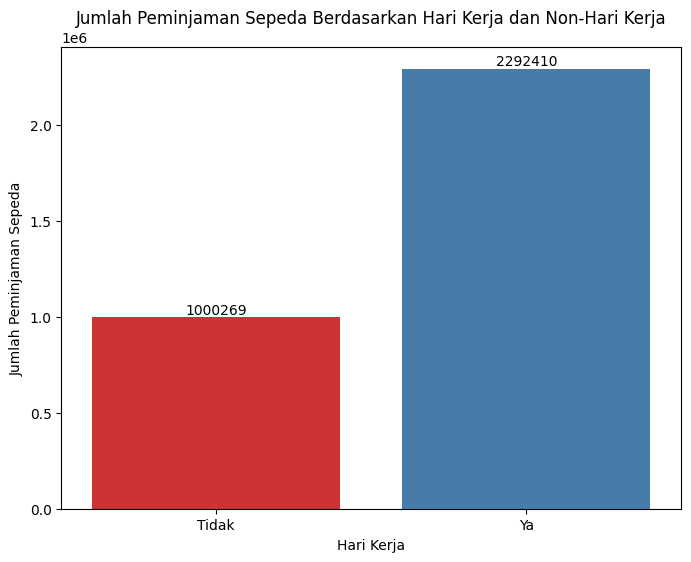

In [25]:
# Membuat barplot jumlah peminjaman sepeda berdasarkan workingday
plt.figure(figsize=(8,6))
sns.barplot(x="workingday", y="count", data=workingday_group,palette="Set1")

# Menambahkan keterangan angka pada setiap bar
for index, value in enumerate(workingday_group["count"]):
    plt.text(index, value, f'{value}', color='black', ha='center', va='bottom')

# Menambahkan judul dan label sumbu
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja dan Non-Hari Kerja")
plt.xlabel("Hari Kerja")
plt.ylabel("Jumlah Peminjaman Sepeda")

# Menampilkan plot
plt.show()

Dapat dilihat output diatas dapat disimpulkan bahwa peminjaman sepeda paling banyak pada waktu kerja daripada non-hari kerja yang jumlahnya sekitar 2292410

4. Mengelompokkan data berdasarkan season dan menghitung rata-rata temp, atemp, dan hum

In [26]:
season_group = day_df.groupby("season")[["temp", "atemp", "hum"]].mean().reset_index()

# Menampilkan hasil pengelompokan
print(season_group)

   season      temp     atemp       hum
0    Fall  0.706309  0.655898  0.633482
1  Spring  0.297748  0.296914  0.582903
2  Summer  0.544405  0.520307  0.626948
3  Winter  0.422906  0.415539  0.668719


4.1 Visualisasi Rata-rata Suhu (``temp`` dan ``atemp``) Berdasarkan Musim

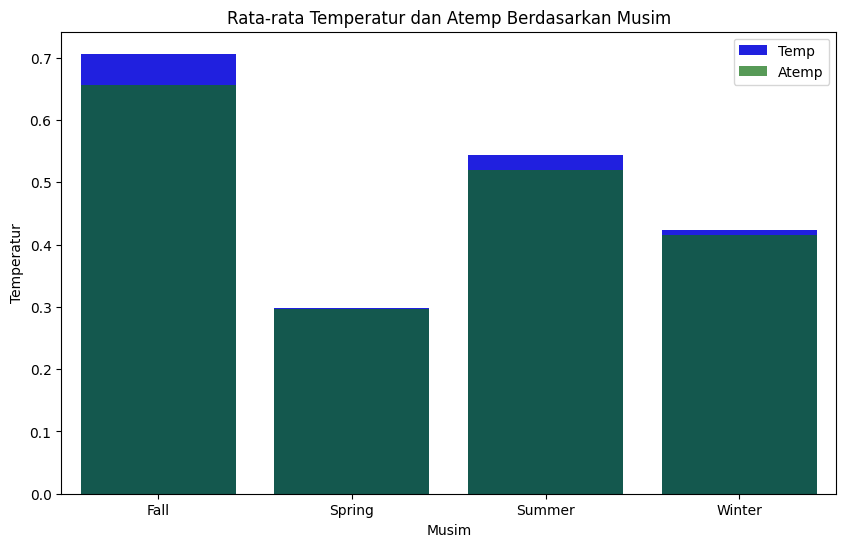

In [27]:
# Membuat plot untuk 'temp' dan 'atemp'
plt.figure(figsize=(10,6))

# Barplot untuk temp
sns.barplot(x="season", y="temp", data=season_group, color="blue", label="Temp")
sns.barplot(x="season", y="atemp", data=season_group, color="green", label="Atemp", alpha=0.7)

# Menambahkan judul dan label
plt.title("Rata-rata Temperatur dan Atemp Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Temperatur")
plt.legend()

# Menampilkan plot
plt.show()

4.2 Visualisasi Rata-rata Kelembaban (``hum``) Berdasarkan Musim

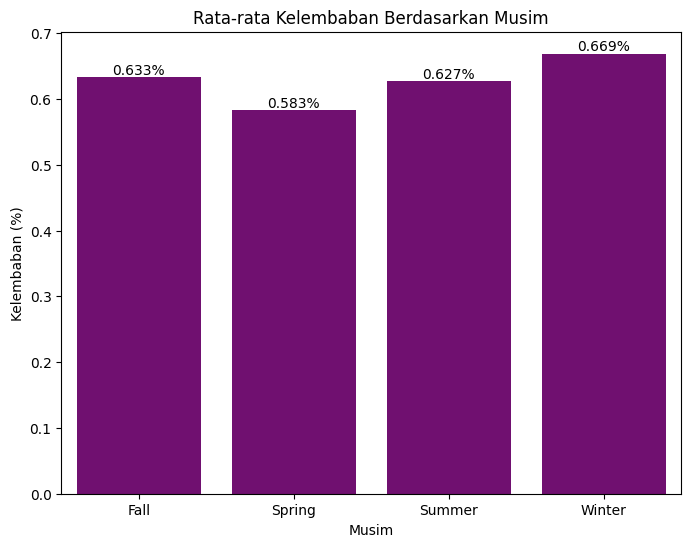

In [28]:
# Membuat plot untuk kelembaban (hum)
plt.figure(figsize=(8,6))

sns.barplot(x="season", y="hum", data=season_group, color="purple")

# Menambahkan keterangan angka pada setiap bar dalam persen
for index, value in enumerate(season_group["hum"]):
    plt.text(index, value, f'{value:.3f}%', color='black', ha='center', va='bottom')

# Menambahkan judul dan label
plt.title("Rata-rata Kelembaban Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Kelembaban (%)")

# Menampilkan plot
plt.show()

Dapat dilihat barplot diatas, rata-rata kelembaban paling tinggi terjadi pada saat musim winter yang dimana kelembaban mencapai angka 0,669% sedangkan untuk kelembaban paling rendah terjadi pada saat musim Spring yang dimana kelembaban mencapai 0,583%

5. Mebandingkan penyewa sepeda pada saat hari kerja (``weekday``) vs akhir pekan (``weekend``)

In [29]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thursday   7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

Berdasarkan output diatas, Urutan rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Friday), Kamis (Thursday), Sabtu (Saturday), Rabu (Wednesday), Selasa (Tuesday), Senin (Monday), dan Minggu (Sunday).

6. Korelasi Antara Kelembapan (``hum``) dan Jumlah Penyewa (``count``)

In [30]:
# Menghitung korelasi antara kelembapan dan jumlah penyewa
corr_hum_cnt = day_df[['hum', 'count']].corr()
print(corr_hum_cnt)


            hum     count
hum    1.000000 -0.100659
count -0.100659  1.000000


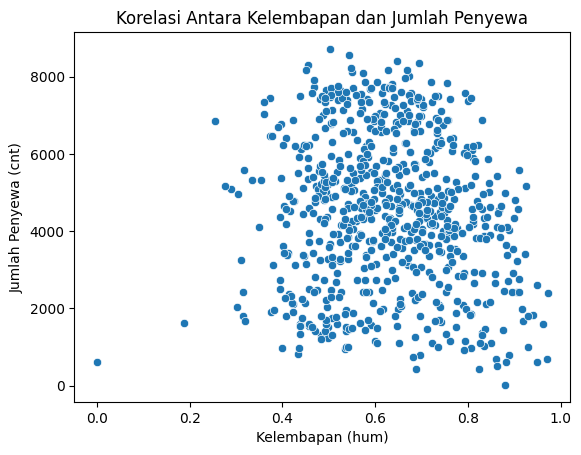

In [31]:
# Visualisasi korelasi antara kelembapan dan jumlah penyewa
sns.scatterplot(x=day_df['hum'], y=day_df['count'])
plt.title("Korelasi Antara Kelembapan dan Jumlah Penyewa")
plt.xlabel("Kelembapan (hum)")
plt.ylabel("Jumlah Penyewa (cnt)")
plt.show()


Dapat dilihat output tersebut ini menunjukkan bahwa ada hubungan positif antara kelembapan dan jumlah penyewa sepeda. Dengan kata lain, ketika kelembapan meningkat, jumlah penyewa sepeda juga cenderung meningkat. Ini mungkin menunjukkan bahwa di hari-hari dengan kelembapan tinggi, lebih banyak orang menyewa sepeda, mungkin karena faktor-faktor lain yang berhubungan dengan cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Distribusi Jumlah Sepeda Yang Dipinjam Selama Setahun?

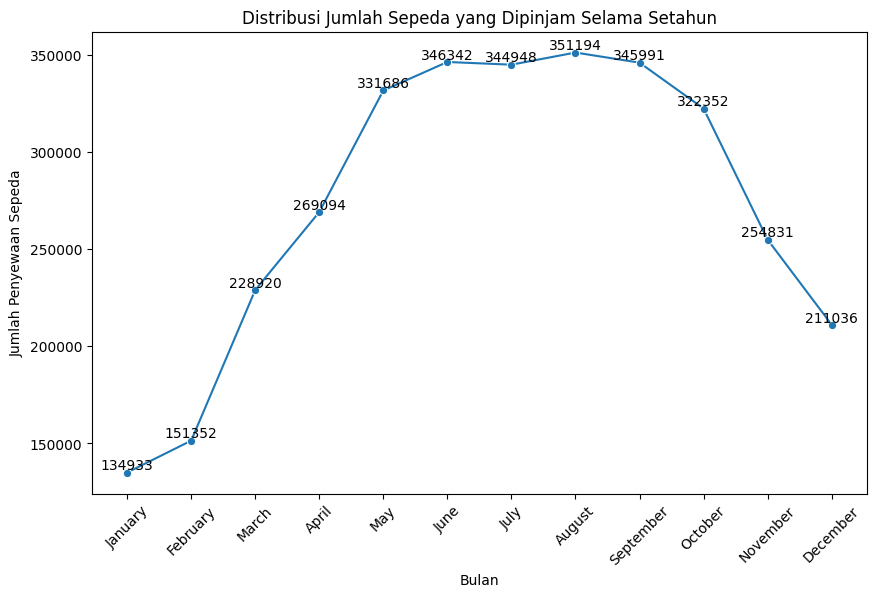

In [32]:
# Kelompokkan jumlah sepeda yang dipinjam ('count') berdasarkan bulan
monthly_rentals = day_df.groupby("month")["count"].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])

# Visualisasikan distribusi jumlah sepeda yang dipinjam selama setahun
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_rentals.index, y=monthly_rentals.values,marker="o")
# Menambahkan keterangan angka pada setiap marker
for x, y in zip(monthly_rentals.index, monthly_rentals.values):
    plt.text(x, y, f'{y}', color='black', ha='center', va='bottom')
plt.title('Distribusi Jumlah Sepeda yang Dipinjam Selama Setahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

Dapat dilihat lineplot tersebut, distribusi jumlah sepeda yang dipinjam selama setahun (2011-2012) paling banyak terjadi pada bulan Agustus yang mencapai angka 351194 sedangkan distribusi jumlah sepeda yang dipinjam selama setahun (2011-2012) paling sedikit terjadi pada bulan January yang mencapai angka 134933 selain itu juga pada bulan January sampai June terjadi peningkatan peminjaman sepeda selama 5 bulan dalam satu tahun. 

### Pertanyaan 2: Apakah Ada Perbedaan Yang Signifikan Dalam Peminjaman Sepeda Antara Hari Kerja dan Hari Libur?

T-Statistic: 1.6543102137118633, P-Value: 0.09849496160024913


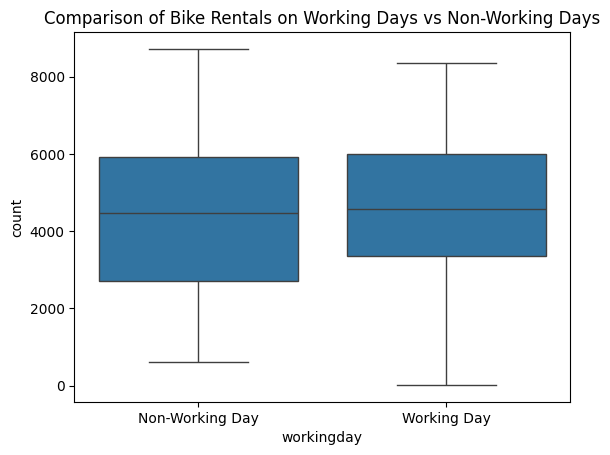

In [33]:
# Mengelompokkan data
workingday_cnt = day_df[day_df['workingday'] == "Ya"]['count']
non_workingday_cnt = day_df[day_df['workingday'] == "Tidak"]['count']

# Uji T-test
t_stat, p_val = ttest_ind(workingday_cnt, non_workingday_cnt)

print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


# Visualisasi
sns.boxplot(x="workingday", y="count", data=day_df)
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.title("Comparison of Bike Rentals on Working Days vs Non-Working Days")
plt.show()

In [34]:
workingday_cnt.describe(include="all")


count     500.000000
mean     4584.820000
std      1878.415583
min        22.000000
25%      3344.250000
50%      4582.000000
75%      5987.500000
max      8362.000000
Name: count, dtype: float64

In [35]:
non_workingday_cnt.describe(include="all")

count     231.000000
mean     4330.168831
std      2052.141245
min       605.000000
25%      2710.500000
50%      4459.000000
75%      5907.500000
max      8714.000000
Name: count, dtype: float64

Dapat dilihat boxplot tersebut bahwa terdapat perbedaan signifikan dalam peminjaman sepeda antara non-hari kerja dan hari kerja, peminjaman sepeda paling banyak yaitu pada saat hari kerja yang dimana ditandai dengan garis pada boxplot tersebut, garis tersebut menandakan adalah median dan median dari hari kerja lebih besar dibandingkan dengan non-hari kerja.

### Pertanyaan 3: Bagaimana Jumlah Peminjaman Sepeda Pada Hari Kerja Dibandingkan Dengan Akhir Pekan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38876\3807103513.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count_by_day_type.index.map({True: 'Akhir Pekan', False: 'Hari Kerja'}), y=count_by_day_type.values, palette='viridis')


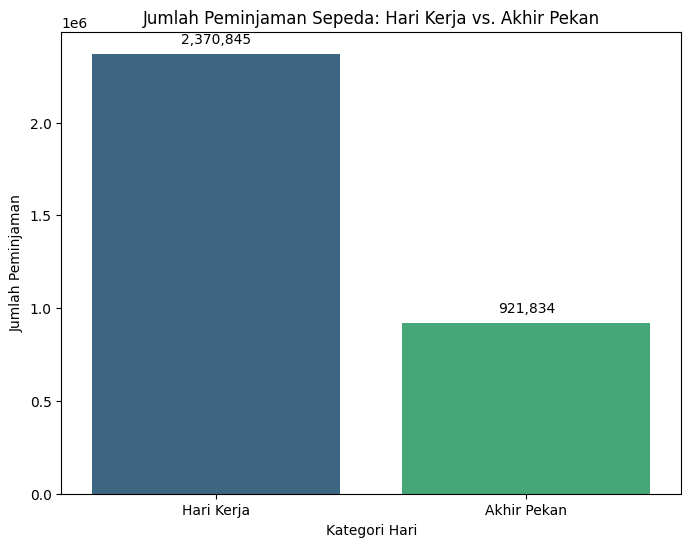

In [36]:
# Menambahkan kolom untuk menandai hari kerja atau akhir pekan
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: x in ['Saturday', 'Sunday'])
# Menghitung jumlah peminjaman berdasarkan hari kerja atau akhir pekan
count_by_day_type = day_df.groupby('is_weekend')['count'].sum()

# Membuat bar chart untuk perbandingan
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=count_by_day_type.index.map({True: 'Akhir Pekan', False: 'Hari Kerja'}), y=count_by_day_type.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Jumlah Peminjaman Sepeda: Hari Kerja vs. Akhir Pekan')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Peminjaman')
plt.show()



In [37]:
#Uji T
# Memisahkan data untuk hari kerja dan akhir pekan
workdays_counts = day_df[day_df['is_weekend'] == False]['count']
weekends_counts = day_df[day_df['is_weekend'] == True]['count']

# Melakukan uji t
t_stat, p_value = ttest_ind(workdays_counts, weekends_counts)
print(f'T-Statistic: {t_stat}, P-Value: {p_value}')

T-Statistic: 1.01602834564195, P-Value: 0.3099529697475421


Dapat dilihat barplot tersebut Jumlah peminjaman sepeda paling banyak terjadi saat hari kerja daripada akhir pekan, untuk jumlah peminjaman sepeda pada saat hari kerja mencapai angka 2.370.845 dan untuk jumlah peminjaman sepeda pada saat akhir pekan mencapai angka 921.834.

## Conclusion

- Conclution pertanyaan 1 : Dapat disimpulkan dengan melihat lineplot yang telah dibuat, Pada bulan Januari jumlah peminjaman sepeda paling sedikit selama setahun (2011-2012) yang mencapai angka 134933 sedangkan untuk jumlah peminjaman sepeda paling banyak terjadi pada bulan Agustus mencapai angka 351194. Peningkatan paling banyak untuk peminjaman sepeda terjadi pada bulan April sampai Mei mencapai 62592 peminjaman sedangkan Pada bulan Juni sampai September ada sedikit penurunan dan kenaikan selain itu pada bulan September sampai Desember terjadi penurunan peminjaman sepeda dan perlu solusi untuk menaikan jumlah pinjaman sepeda untuk bulan September sampai Desember khususnya pada hari kerja.
- Conclution pertanyaan 2 : Dengan menggunakan T-test dan memvisualisasikan menggunakan boxplot untuk mencari apakah ada perbedaan signifikan dalam jumlah peminjaman sepeda pada saat hari kerja dan non-hari kerja sehingga di dapatkan p-value menggunakan T-test bernilai 0,09849496160024913 karena nilai tersebut > 0,05 maka ada perbedaan yang tidak signifikan yang dimana Q3 hari kerja bernilai 5987,5 sedangkan non-hari kerja bernilai 5907,5 selisih keduanya sedikit sehingga ada perbedaan yang tidak begitu signifikan.
- Conclution pertanyaan 3 : Pada Visualisasi barplot tersebut jumlah peminjaman sepeda pada saat hari kerja dan akhir pekan terdapat perbedaan yang mencolok yang dimana jumlah peminjaman sepeda pada hari kerja sekitar 2.370.845 dan jumlah peminjaman sepeda pada akhir pekan mencapai angka 921.834 hal ini disebabkan karena aktivitas pada hari kerja sepeda digunakan untuk transportasi. 